
# Investigate a Dataset of TMDb Movies

By Maciej Socha for Data Analyst Nanodegree

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDb Movies Dataset contains ofer 10 tousand movies which include for example revenues, user raitings. This database was cleaned and taken from Kaggle. In total there are 21 columns with various needed informations. 

> For example in cast or genres values are separated by pipe "|" but we will not look into that in following data analys. On top of that, some strange chars can be found in cast columns, however we will skip them also.

> Revenue and budget were counted for 2010 USD accounting inflation. 

## Questions:

Some important questions I will focus on in this analysis:
    - Correlation between runtime to raiting
    - Mean budget per year
    - Mean revenue per year
    - Correlation between movie budgets and raiting
    - Correlation between movie revenues and raiting
    - Length of the movies between years
    - Number of movies released over time

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

To load and explore dataset we will use Pandas. This library contains plenty of useful functions and can give us quick overview of dataset.
### General Properties

In [2]:
# Loading data.
df = pd.read_csv('tmdb-movies.csv')
# Printing out a few first lines
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Printing out a few last lines
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
#lets see what we are working with
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning

## Finding what data looks like

In [5]:
df.shape

(10866, 21)

There is 10866 movies and each of them has 21 properties (columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There is few rows in genres column with NaN values, we will drop them later of for simplicity.

Let's delete columns we will not use

In [7]:
to_delete = [ 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline',
             'keywords', 'overview', 'production_companies', 'vote_count']

df = df.drop(to_delete, axis = 1)

Taking a look at changed dataset and it looks more pleasant, there is still some work to be done though.

In [8]:
df.head()

,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


For rest of the columns, as revenue, budget, vote_average, runtime we have to check if any of them are equal to 0 and drop them also.

In [9]:
#for revenue and  budget in 2010 USD we have to use revenue_adj budget_adj instead of revenue and  budget
print(' Revenue minimum:' , min(df['revenue_adj']))
print(' Budget minimum:' , min(df['budget_adj']))
print(' Runtime minimum:' , min(df['runtime']))
print(' Vote average minimum:' , min(df['vote_average']))

 Revenue minimum: 0.0
 Budget minimum: 0.0
 Runtime minimum: 0
 Vote average minimum: 1.5


Ok, we know we have some incostistent data in our data base, firstly we will find out how many of them we shall delete.

Vote Average seems possible, altough 1.5 is very low and this movie shouldn't exists, we will still keep it. 

In [10]:
print(' Revenue "0" count', df.revenue_adj.isin([0]).sum())
print(' Budget "0" count', df.budget_adj.isin([0]).sum())
print(' Runtime "0" count', df.runtime.isin([0]).sum())

 Revenue "0" count 6016
 Budget "0" count 5696
 Runtime "0" count 31


Dropping rows containing "0"

In [11]:
to_change = ['revenue_adj', 'budget_adj', 'runtime'] 
df[to_change] = df[to_change].replace(0, np.NAN)

Checking if it worked

In [12]:
print(' Revenue minimum:' , min(df['revenue_adj']))
print(' Budget minimum:' , min(df['budget_adj']))
print(' Runtime minimum:' , min(df['runtime']))

 Revenue minimum: 2.37070528956505
 Budget minimum: 0.921091050771459
 Runtime minimum: 2.0


Dropping those NaN's from our dataset

In [13]:
df.dropna(subset = to_change, inplace = True)

Checking if it worked

In [14]:
df.shape

(3855, 8)

Chaning budget_adj and revenue_adj to more human readible format:

In [15]:
df['budget_adj'] = df['budget_adj'].astype(float)
df['revenue_adj'] = df['revenue_adj'].astype(float)

In [16]:
df.head()

,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,137.0,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


After cleaning of our data we had to drop A LOT of movies. Most of them were dropped for revenue and budget analysis. We will reload file once again to make comparasions for runtime 

Quick overview of our cleaned dataset:

In [17]:
df.describe()

,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,109.215824,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,19.922166,0.79504,11.281989,4.480403e+07,2.160944e+08
min,15.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,95.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,106.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,119.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,338.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question: Runtime compared to raiting

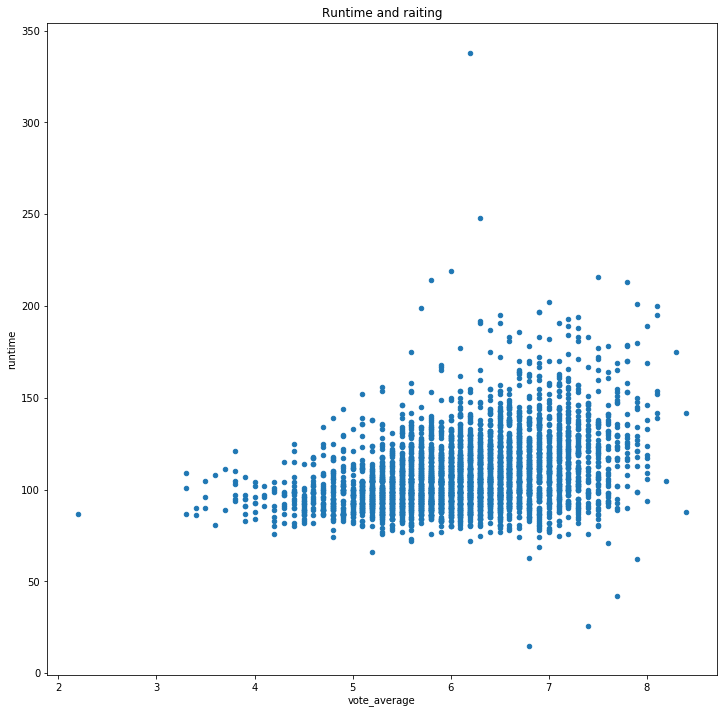

In [18]:
df.plot( x='vote_average', y = 'runtime', kind = 'scatter', figsize=(12,12));
plt.title('Runtime and raiting');

Except seeing that most of the movies are about 110 minues long there is no strong connection to raitings as they are all over the place. Movies with runtime lower than 50 might get better raiting, but there is too litle data to say it for sure.

### Research Question: Mean budget per year

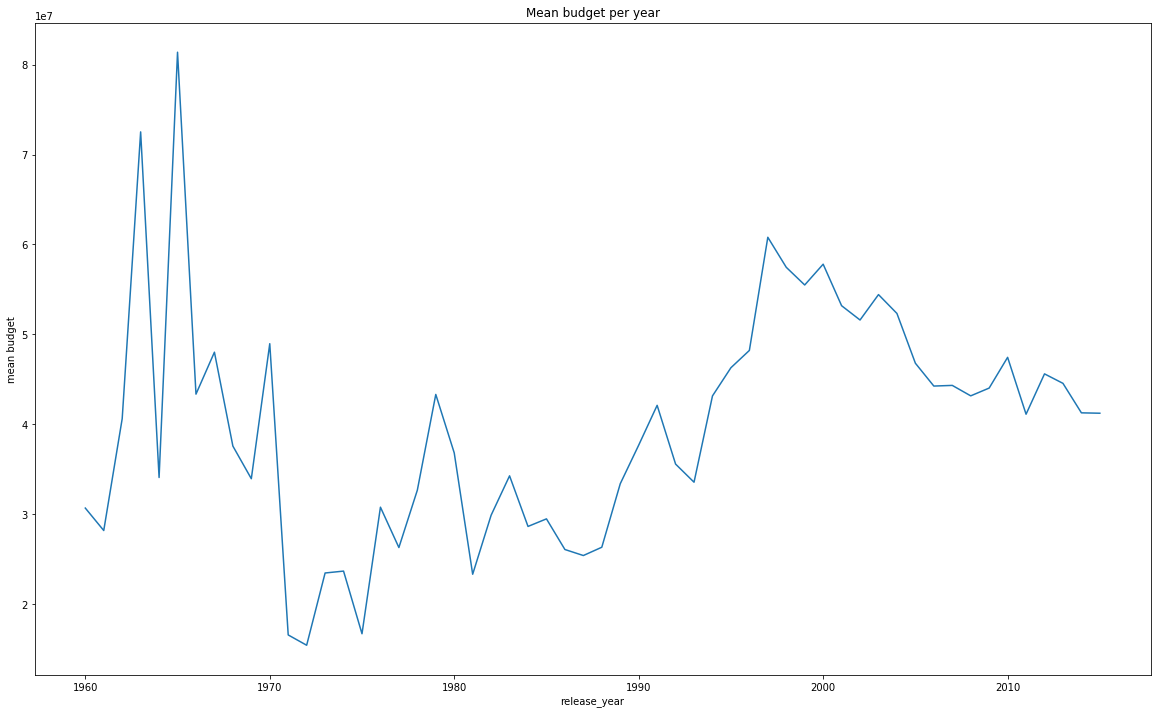

In [19]:
df.groupby('release_year').mean().budget_adj.plot(figsize=(20,12))
plt.title('Mean budget per year')
plt.ylabel('mean budget')
plt.show()

There is small correlation betweend earlier years, where movies were expensive and recent (past 1995). Back in 1960s movie companies were just starting to go into the main stream, nowadays budgets are getting bigger because of growing number of releasing movies.

### Research Question: Mean revenue per year

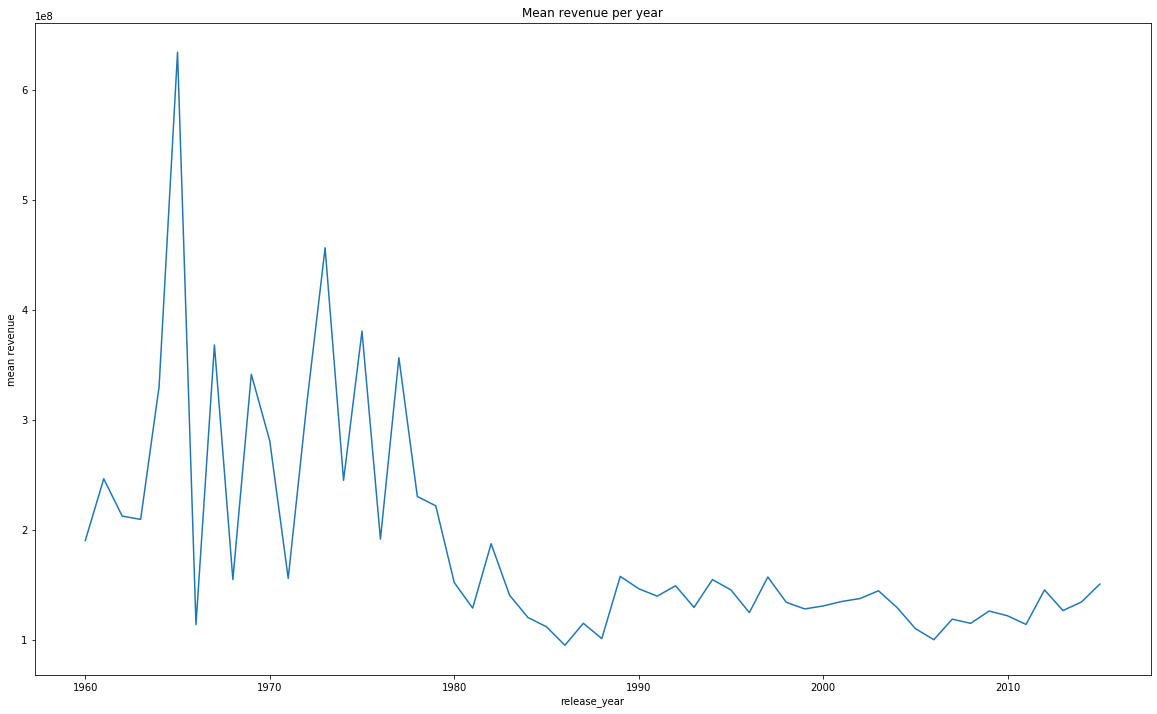

In [20]:
df.groupby('release_year').mean().revenue_adj.plot(figsize=(20,12))
plt.title('Mean revenue per year')
plt.ylabel('mean revenue')
plt.show()

We can clearly see that it has been harder and harder to make decent revenue with each year

### Research Question: Correlation between movie budgets and ongoing time

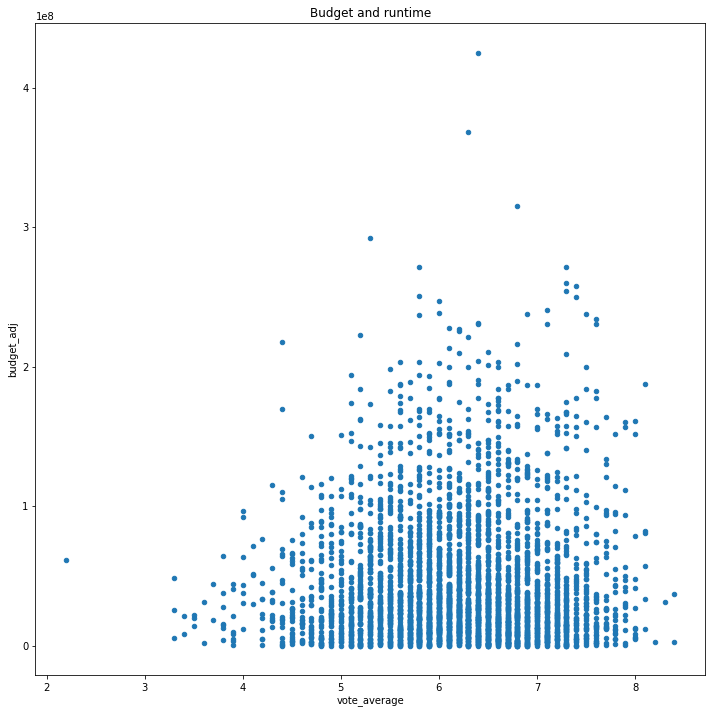

In [21]:
df.plot( y='budget_adj', x = 'vote_average', kind = 'scatter', figsize=(12,12))
plt.title('Budget and runtime');

### Research Question: Correlation between movie revenues and ongoing time

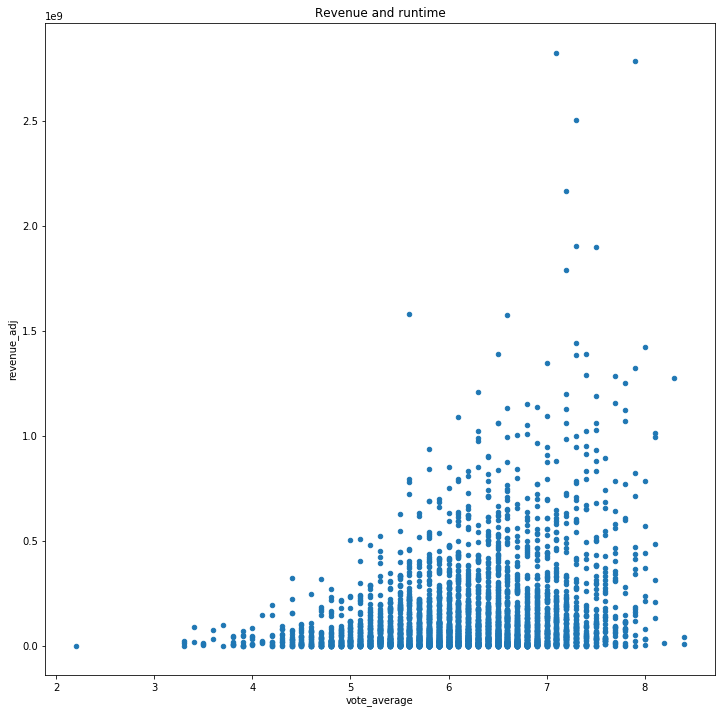

In [22]:
df.plot( y='revenue_adj', x = 'vote_average', kind = 'scatter', figsize=(12,12))
plt.title('Revenue and runtime');

With higher raiting creators can expect higher revenues. There is few outliers on higher vote average, but because there is so few of them they can be skipped in overlooking of the results




Now creating new data frame to answer more general questions

In [28]:
df_clean = pd.read_csv('tmdb-movies.csv')
df_clean.sort_values('vote_average')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.000000e+00
7772,25055,tt0960835,0.121120,0,0,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,NaN,Leigh Scott,NaN,...,About a race of alien robots that have conquer...,86,Action|Adventure|Science Fiction,"Asylum, The",6/26/07,10,1.5,2007,0.000000,0.000000e+00
4882,120846,tt2071491,0.079281,0,0,Jurassic Shark,Emanuelle Carriere|Christine Emes|Celine Filio...,NaN,Brett Kelly,Dinosaur from the deep,...,When an oil company unwittingly unleashes a pr...,75,Action|Horror|Science Fiction,Dudez Productions,9/21/12,13,2.0,2012,0.000000,0.000000e+00
3822,83896,tt1844770,0.159707,0,0,Sand Sharks,Corin Nemec|Brooke Hogan|Vanessa Evigan|Eric S...,NaN,Mark Atkins,Just When You Thought You Were Safe Out of the...,...,Just when you thought it was safe to go back t...,87,Comedy|Horror|Science Fiction,Rogue State|Remember Dreaming Productions|Litt...,12/20/11,17,2.1,2011,0.000000,0.000000e+00
7220,31117,tt0270846,0.157959,0,9109322,Superbabies: Baby Geniuses 2,Jon Voight|Scott Baio|Vanessa Angel|Skyler Sha...,http://www.sonypictures.com/movies/superbabies...,Bob Clark,Meet the new generation of superheroes.,...,"Following on from the plot of the last movie, ...",88,Family|Comedy,Crystal Sky Worldwide|Triumph Films,8/27/04,11,2.1,2004,0.000000,1.051621e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,24970,tt0110758,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,NaN,David Mallet,NaN,...,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/06,23,8.7,2006,0.000000,0.000000e+00
2269,51299,tt1828232,0.222293,0,0,Life Cycles,NaN,http://www.lifecyclesfilm.com/,Derek Frankowski,NaN,...,Life Cycles tells a spectacular story of the b...,47,Documentary,NaN,10/2/10,27,8.8,2010,0.000000,0.000000e+00
1200,374430,tt3973198,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,NaN,Carl Tibbetts,NaN,...,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/14,41,8.8,2014,0.000000,0.000000e+00
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.000000e+00


### Research Question: Length of the movies between years


In [ ]:
df_2 =  df_clean.groupby('release_year')
df_2.runtime.mean().plot.bar(figsize=(20, 15))
plt.title('Runtime per year')
plt.show()

On first look, as with progress we have less and less time people tend to choose shorter movies, but changes are not consistent and cannot be taken for granted.

### Research Question: Number of movies released over time

In [ ]:
df_clean.groupby('release_year')['id'].count().plot.bar(figsize=(20, 15))
plt.ylabel('count_of_movies')
plt.title('Movies in each year')
plt.show()

With each year there is more and more movies. 

<a id='conclusions'></a>
## Conclusions

There was only ~40% of the data viable for most of our testing, some of them still have had inconsistent data, it could've been definetelly handled better.
### Key observations:
     -With each year there is more movies and each of them is, on average, shorter.
     -It is suginificantly cheaper to create movies comparing to begginings of the dataset
     -Even though its cheaper and there is more movies, revenues are falling and has been on the same average level for past 10 years
     -With higher budgets you can expect higher raitings and revenues, but there is no strict rule for that. Apparently there are other factors which should be taken into consideration to answer this question. Moreover, we have data only up to 2015, and it doesnt includes data about world trends in generes, top actors etc.
     -With over 10800 movies you could watch new movie a day for the next 30 years (and in 2050 you would catch up with all of 2015 movies)